In [1]:
import pandas as pd

# Load the dataset
file_path = 'Mental_Health_Care_in_the_Last_4_Weeks.csv'
data = pd.read_csv(file_path)

# Convert date columns to datetime
data['Time Period Start Date'] = pd.to_datetime(data['Time Period Start Date'], errors='coerce')
data['Time Period End Date'] = pd.to_datetime(data['Time Period End Date'], errors='coerce')

# Drop rows with missing 'Value' column
data_cleaned = data.dropna(subset=['Value'])

# Inspect cleaned data
print(data_cleaned.head())


                                           Indicator              Group  \
0  Took Prescription Medication for Mental Health...  National Estimate   
1  Took Prescription Medication for Mental Health...             By Age   
2  Took Prescription Medication for Mental Health...             By Age   
3  Took Prescription Medication for Mental Health...             By Age   
4  Took Prescription Medication for Mental Health...             By Age   

           State       Subgroup Phase  Time Period      Time Period Label  \
0  United States  United States     2           13  Aug 19 - Aug 31, 2020   
1  United States  18 - 29 years     2           13  Aug 19 - Aug 31, 2020   
2  United States  30 - 39 years     2           13  Aug 19 - Aug 31, 2020   
3  United States  40 - 49 years     2           13  Aug 19 - Aug 31, 2020   
4  United States  50 - 59 years     2           13  Aug 19 - Aug 31, 2020   

  Time Period Start Date Time Period End Date  Value  LowCI  HighCI  \
0             2

In [2]:
#Exploratory Data Analysis (EDA)

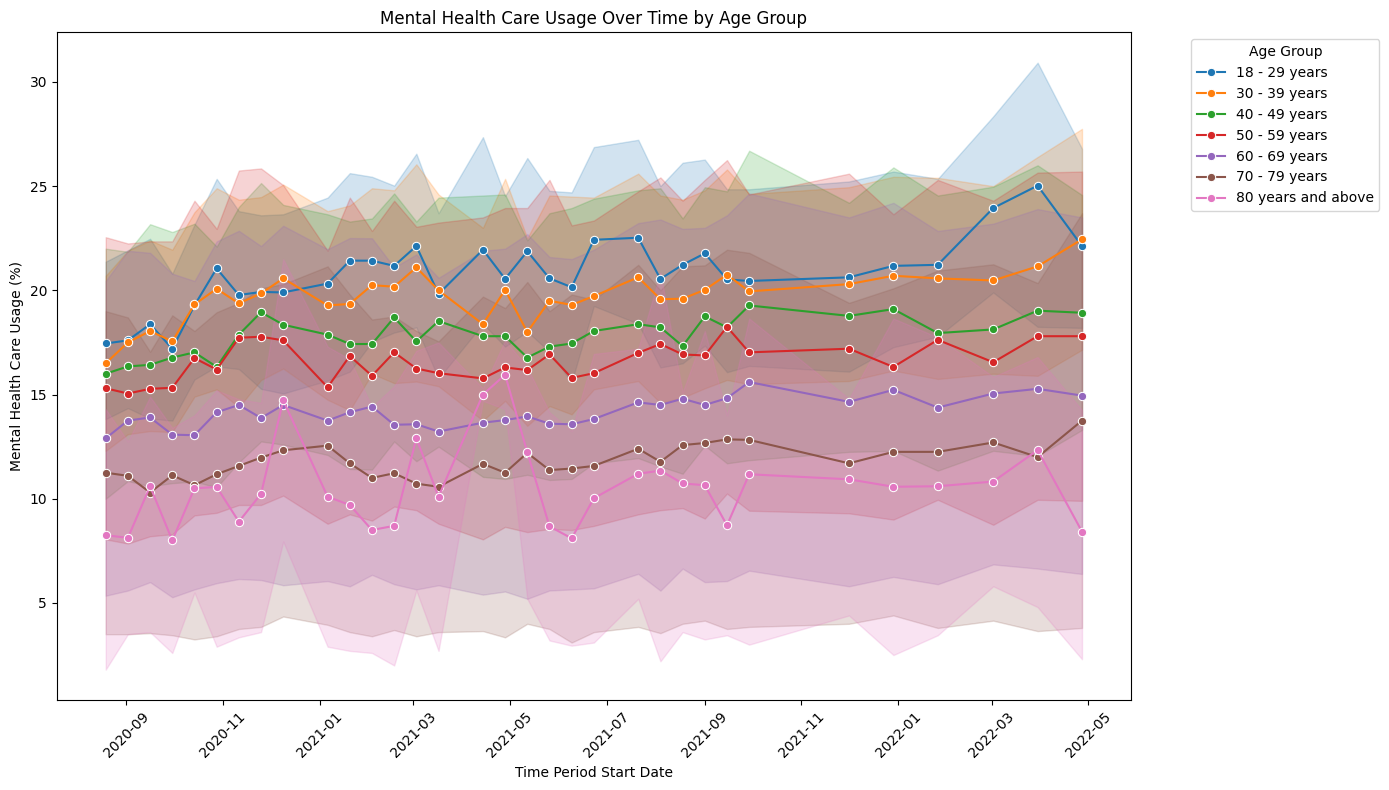

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for age-related data
age_data = data_cleaned[data_cleaned['Group'] == 'By Age']

# Plot time-series data for different age groups
plt.figure(figsize=(14, 8))
sns.lineplot(data=age_data, x='Time Period Start Date', y='Value', hue='Subgroup', marker='o')
plt.title('Mental Health Care Usage Over Time by Age Group')
plt.xlabel('Time Period Start Date')
plt.ylabel('Mental Health Care Usage (%)')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


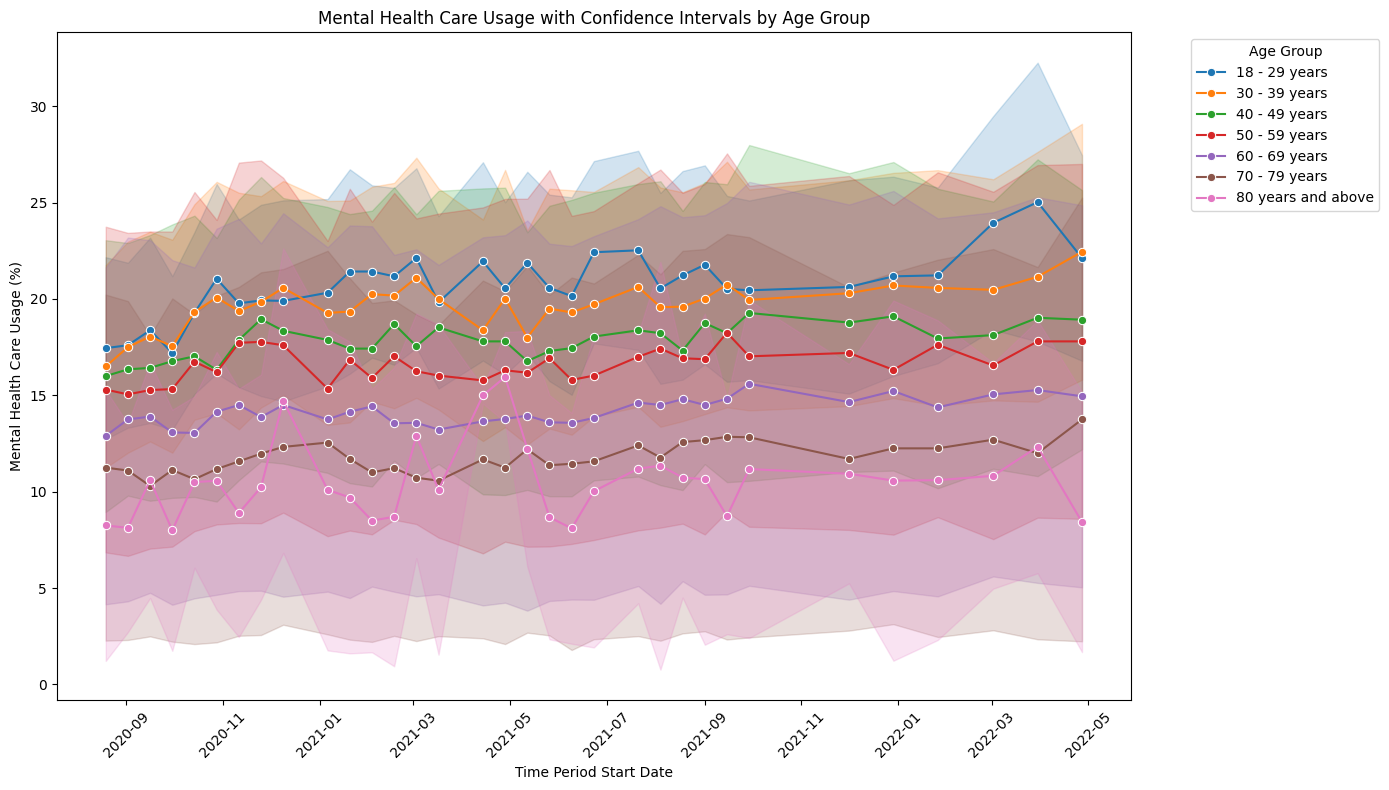

In [5]:
# Plot with confidence intervals for each age group
plt.figure(figsize=(14, 8))
sns.lineplot(data=age_data, x='Time Period Start Date', y='Value', hue='Subgroup', marker='o', errorbar='sd')
plt.title('Mental Health Care Usage with Confidence Intervals by Age Group')
plt.xlabel('Time Period Start Date')
plt.ylabel('Mental Health Care Usage (%)')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


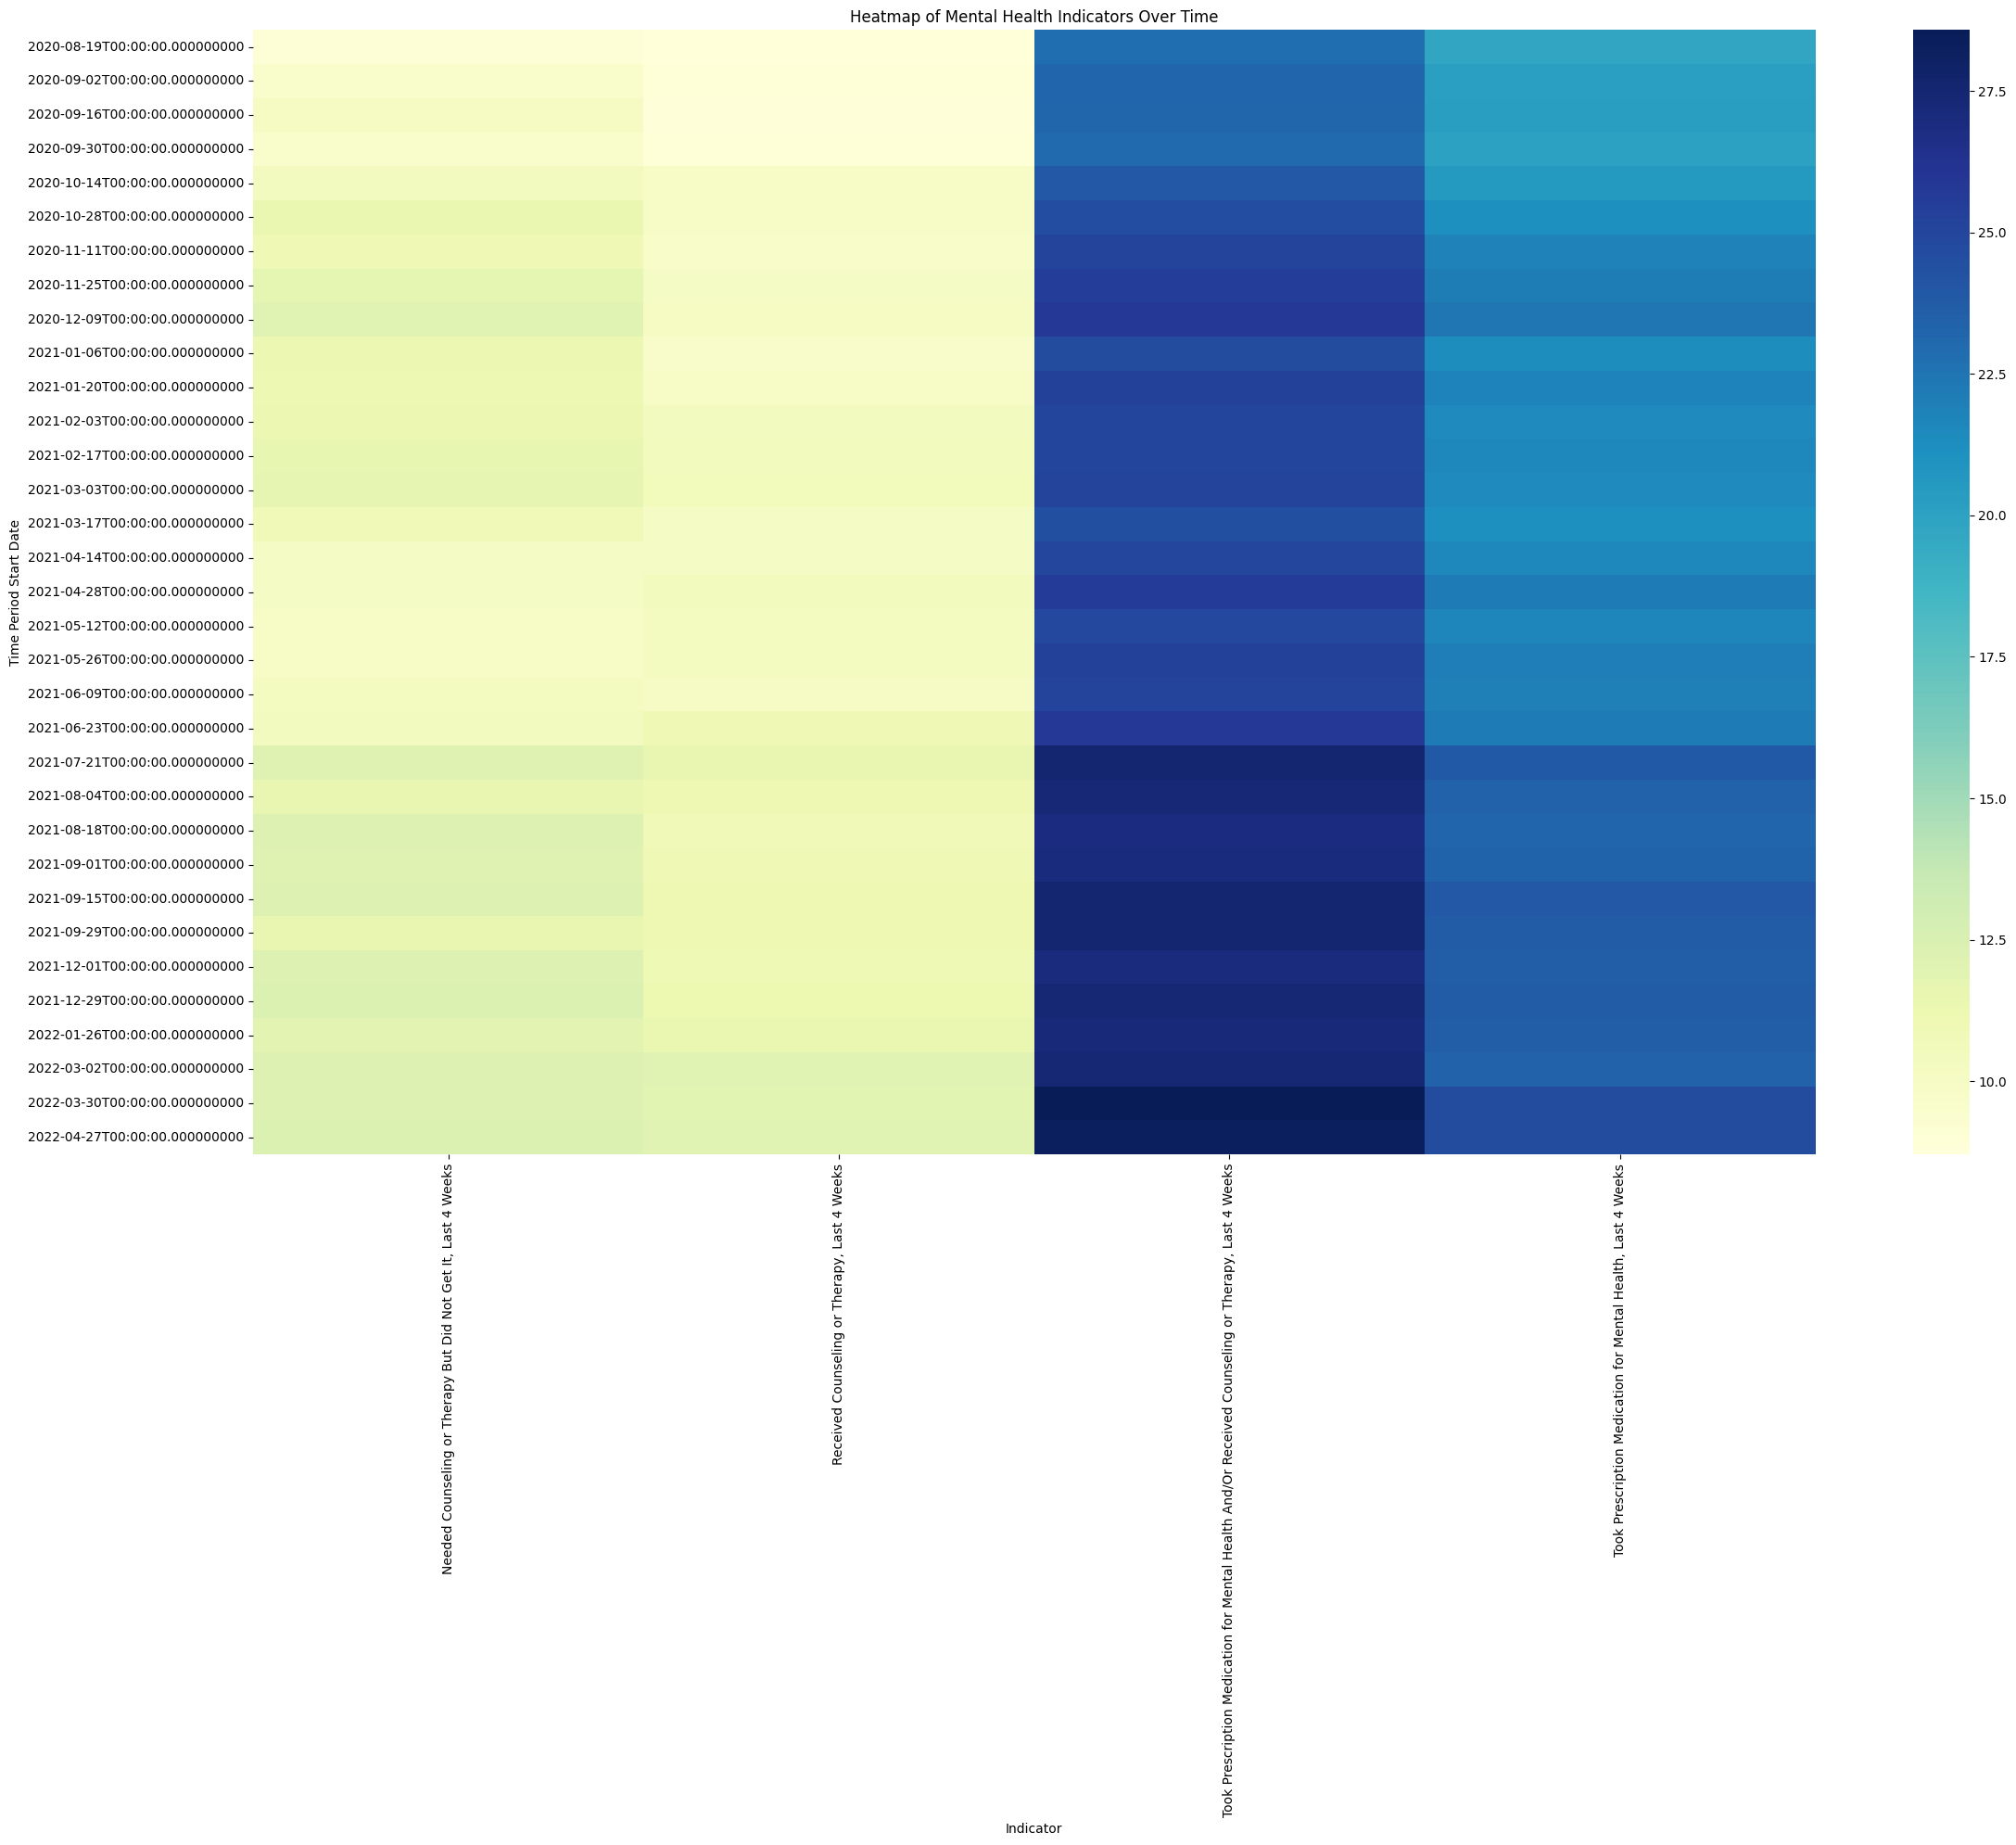

In [6]:
# Heatmap of Mental Health Indicators by Subgroup and Time Period

# Filter for relevant indicators and subgroups
indicator_data = data_cleaned.pivot_table(values='Value', index='Time Period Start Date', columns='Indicator', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(indicator_data, cmap="YlGnBu", annot=False, cbar=True)
plt.title('Heatmap of Mental Health Indicators Over Time')
plt.xlabel('Indicator')
plt.ylabel('Time Period Start Date')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


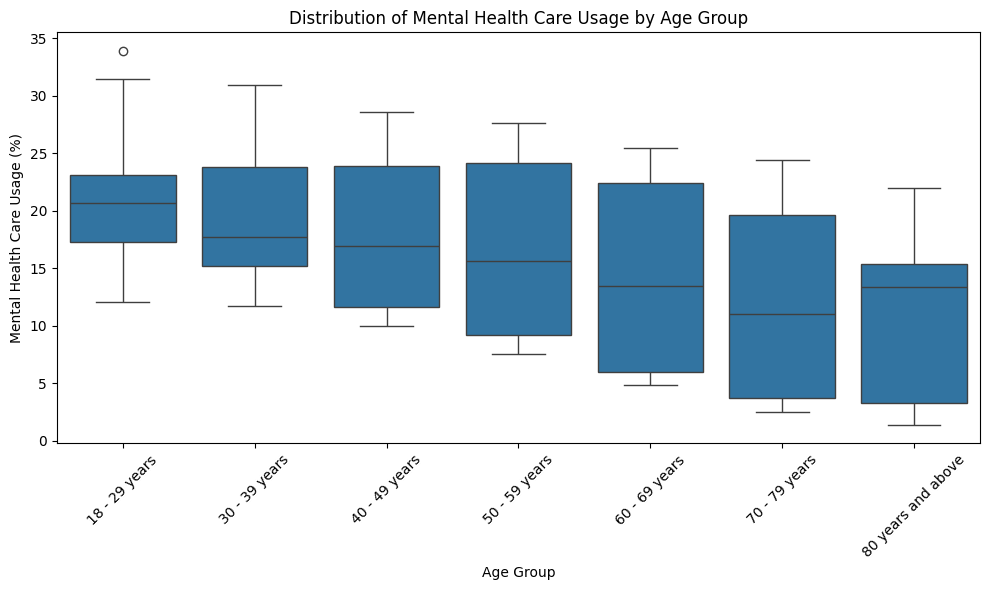

In [7]:
# Box Plot of Mental Health Care Usage by Age Group

# Plot box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=age_data, x='Subgroup', y='Value')
plt.title('Distribution of Mental Health Care Usage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mental Health Care Usage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


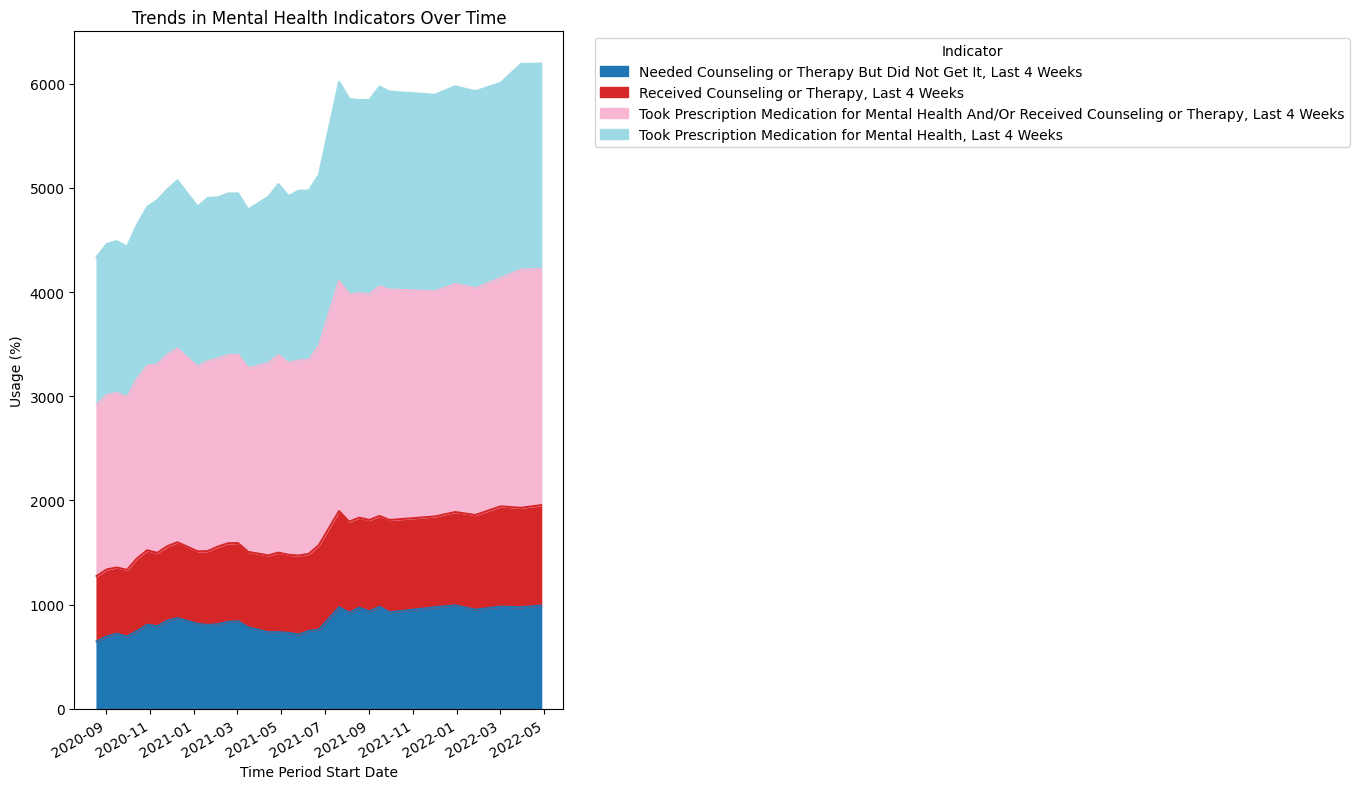

In [8]:
# Stacked Area Plot for Indicator Trends Over Time

# Filter and pivot data for indicator trends over time
indicator_trend = data_cleaned.pivot_table(values='Value', index='Time Period Start Date', columns='Indicator', aggfunc='sum')

# Plot stacked area chart
indicator_trend.plot(kind='area', stacked=True, figsize=(14, 8), cmap='tab20')
plt.title('Trends in Mental Health Indicators Over Time')
plt.xlabel('Time Period Start Date')
plt.ylabel('Usage (%)')
plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


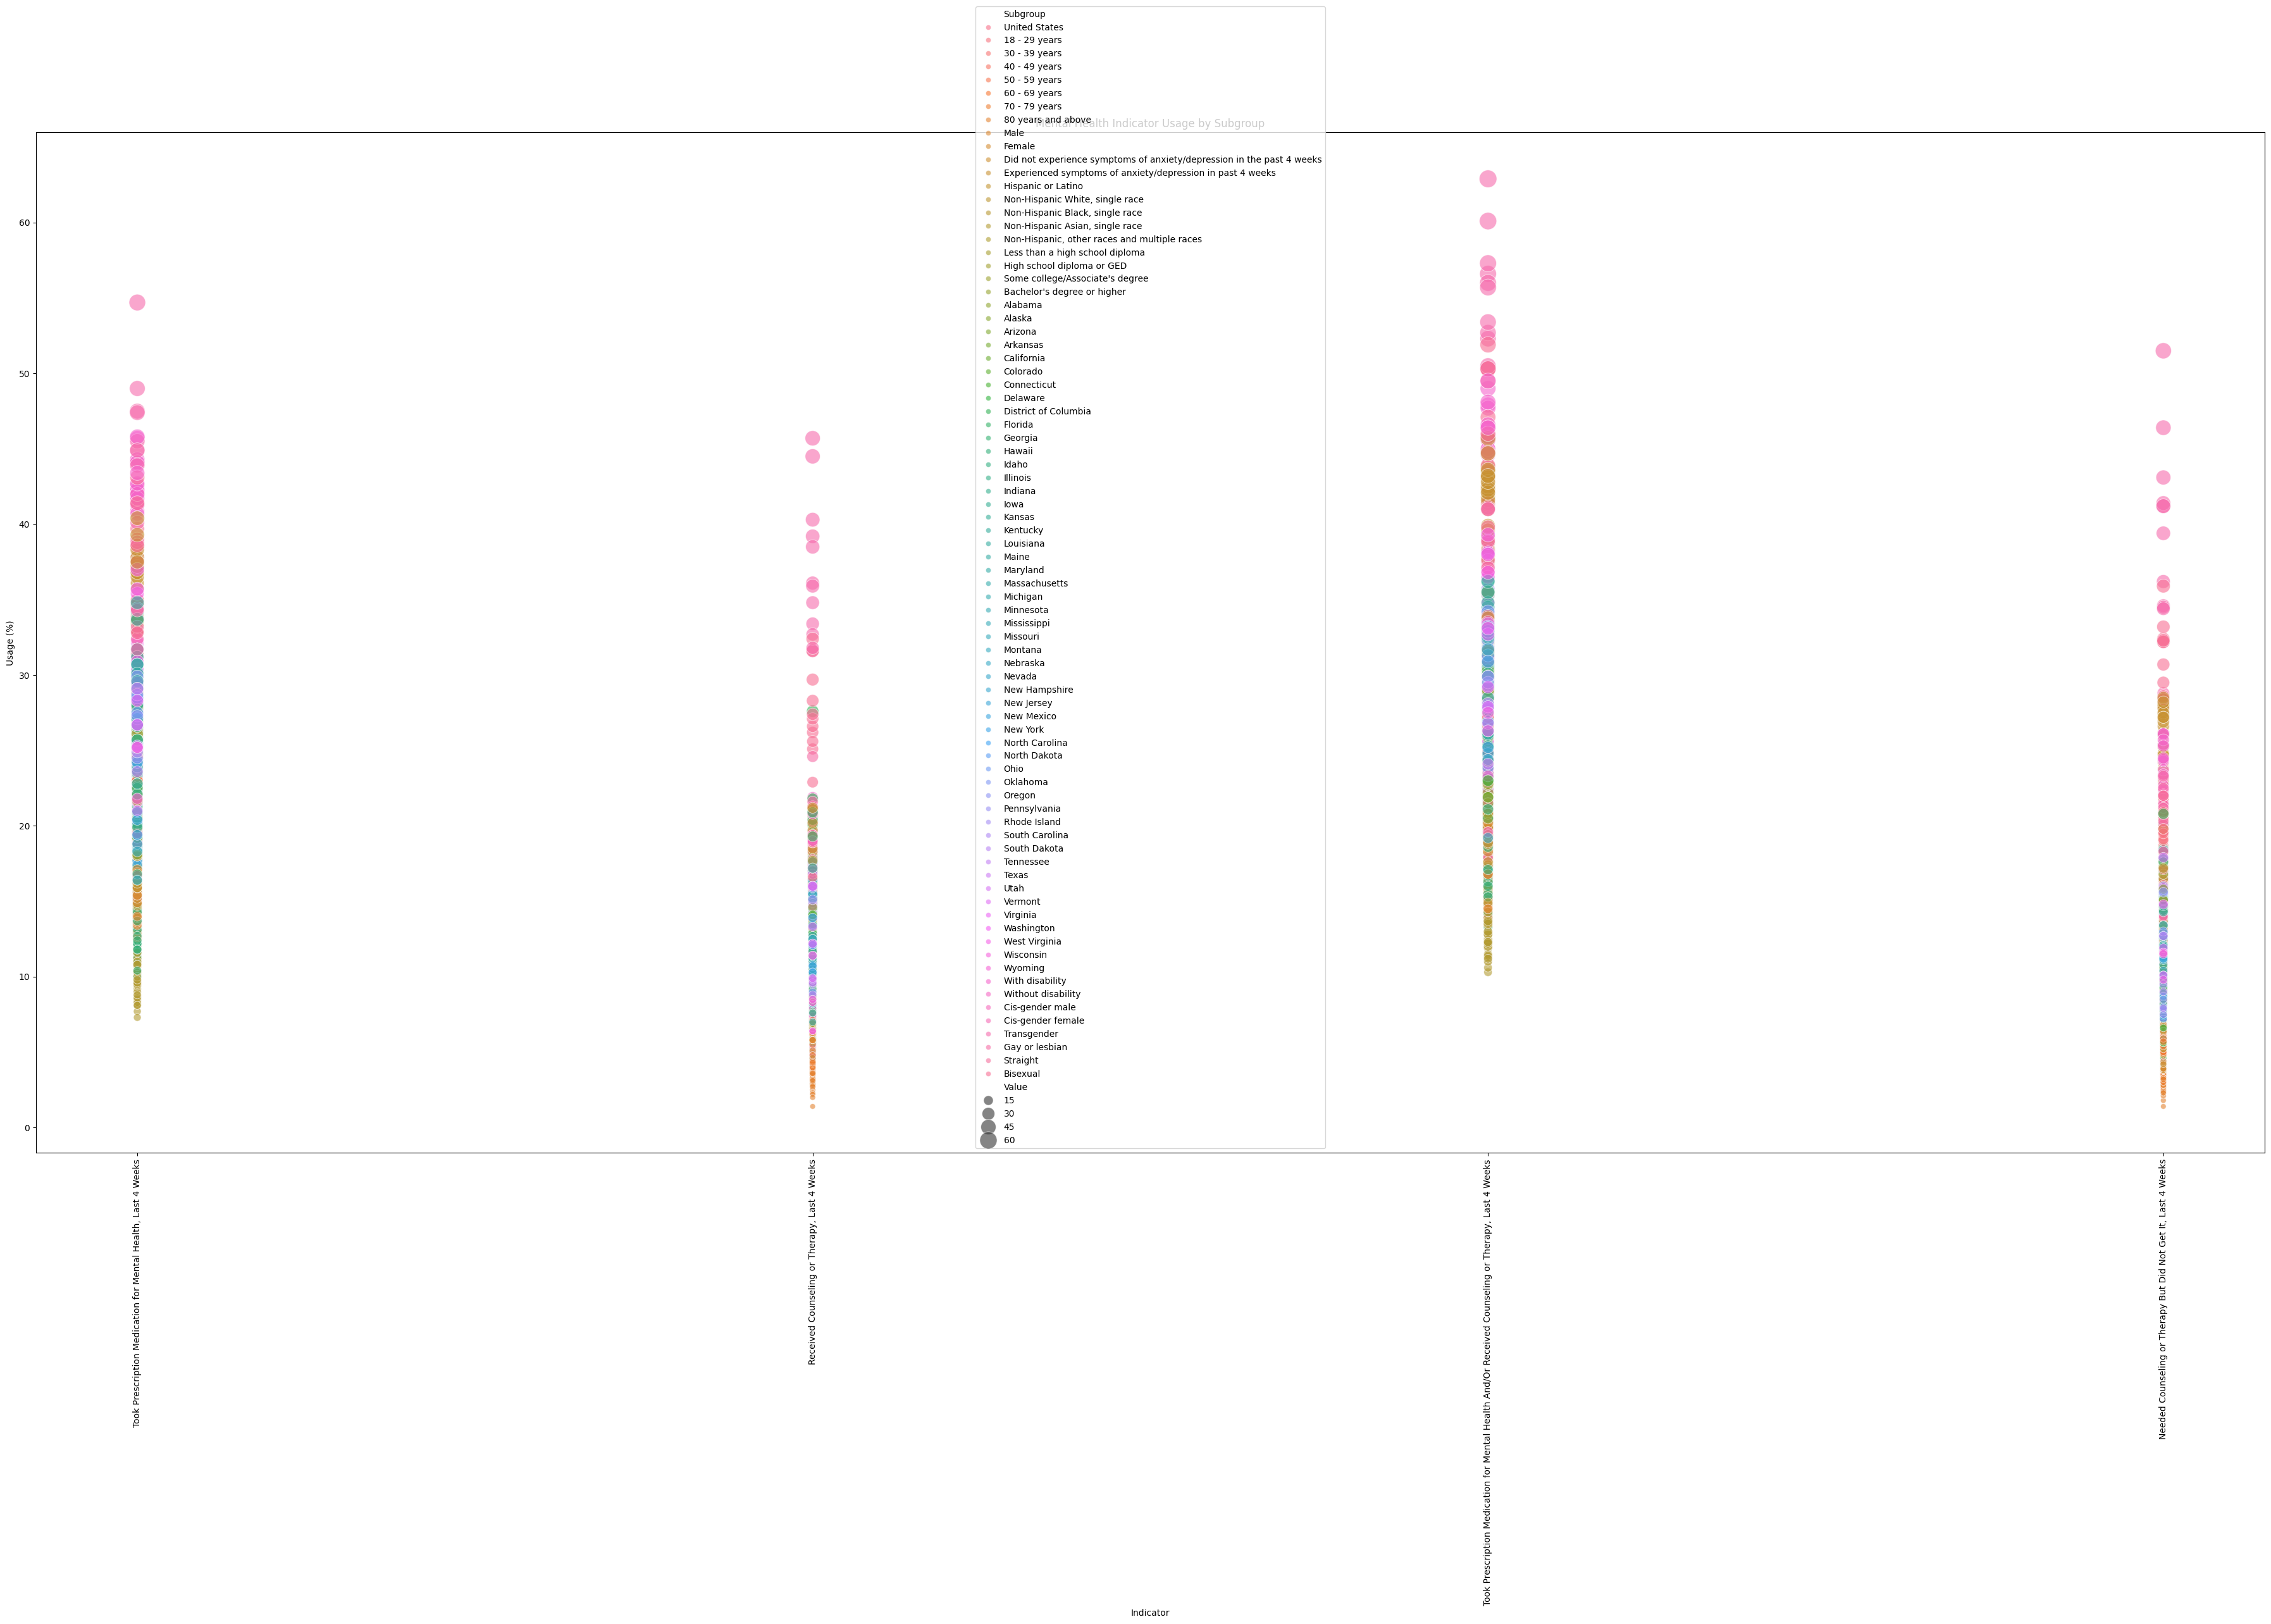

In [9]:
# Bubble Chart of Mental Health Usage by Subgroup and Indicator

# Scatter plot for different indicators by age group
plt.figure(figsize=(36, 24))
sns.scatterplot(data=data_cleaned, x='Indicator', y='Value', size='Value', hue='Subgroup', alpha=0.6, sizes=(40, 400))
plt.title('Mental Health Indicator Usage by Subgroup')
plt.xlabel('Indicator')
plt.ylabel('Usage (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


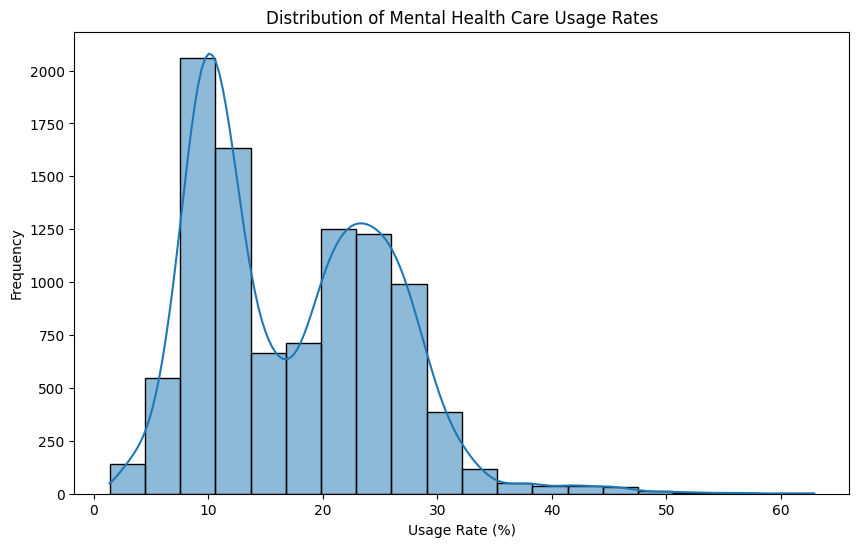

In [10]:
# Histogram of Mental Health Care Usage Rates

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Value'], bins=20, kde=True)
plt.title('Distribution of Mental Health Care Usage Rates')
plt.xlabel('Usage Rate (%)')
plt.ylabel('Frequency')
plt.show()


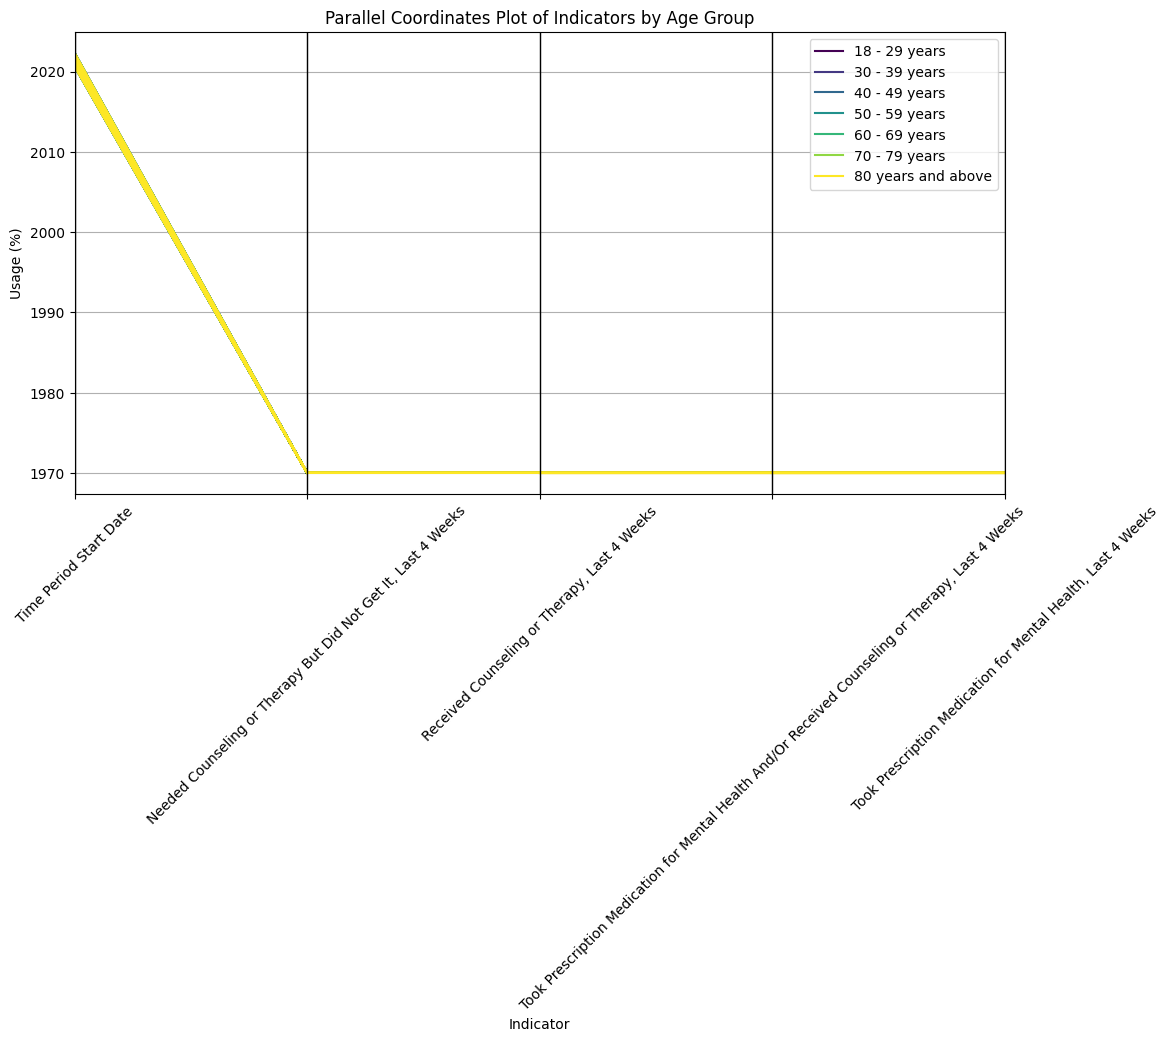

In [11]:
#  Parallel Coordinates Plot for Multiple Indicators by Subgroup

from pandas.plotting import parallel_coordinates

# Select subset of indicators and subgroups for plotting
parallel_data = data_cleaned[data_cleaned['Group'] == 'By Age']
parallel_data = parallel_data.pivot_table(values='Value', index=['Subgroup', 'Time Period Start Date'], columns='Indicator')

# Plot parallel coordinates
plt.figure(figsize=(12, 6))
parallel_coordinates(parallel_data.reset_index(), 'Subgroup', colormap='viridis')
plt.title('Parallel Coordinates Plot of Indicators by Age Group')
plt.xlabel('Indicator')
plt.ylabel('Usage (%)')
plt.xticks(rotation=45)
plt.show()


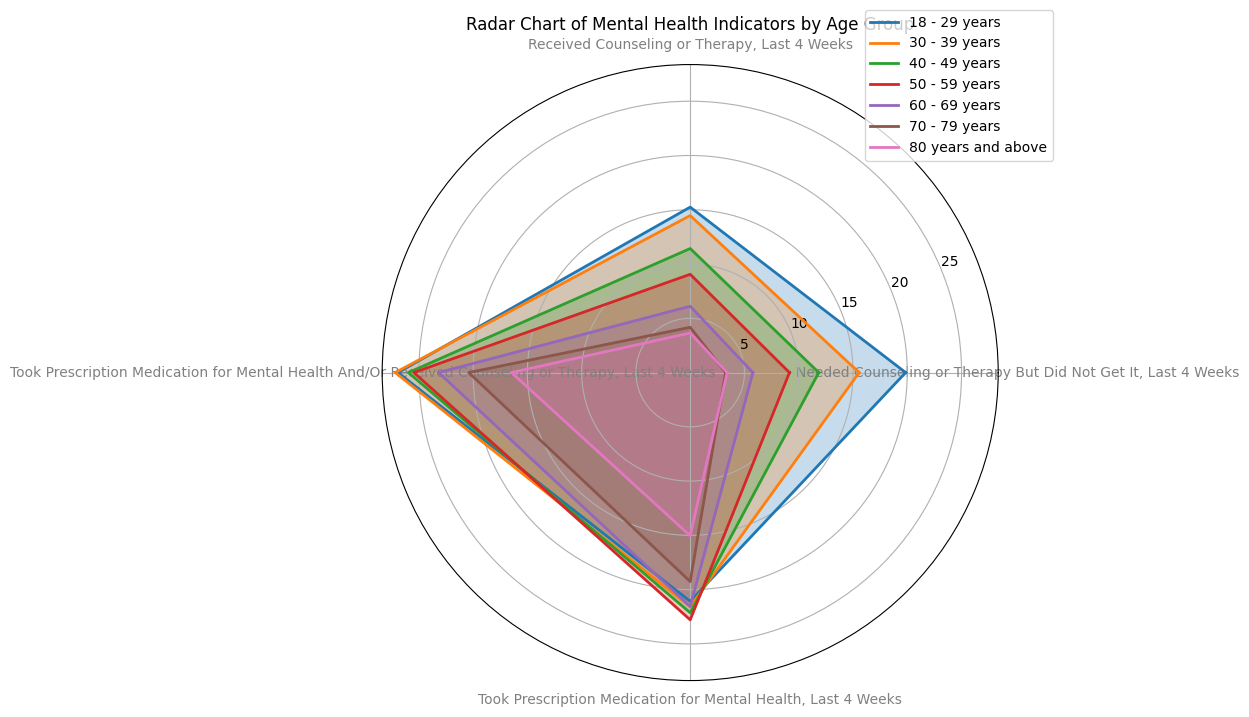

In [12]:
# Radar Chart for Indicator Comparison by Age Group

from math import pi

# Example for radar plot of two age groups
age_group_data = data_cleaned[data_cleaned['Group'] == 'By Age'].pivot_table(values='Value', index='Indicator', columns='Subgroup', aggfunc='mean')

# Plot radar chart
labels = age_group_data.index
num_vars = len(labels)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each age group
for age_group in age_group_data.columns:
    values = age_group_data[age_group].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=age_group)
    ax.fill(angles, values, alpha=0.25)

# Add labels
plt.xticks(angles[:-1], labels, color='grey', size=10)
plt.title('Radar Chart of Mental Health Indicators by Age Group')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()


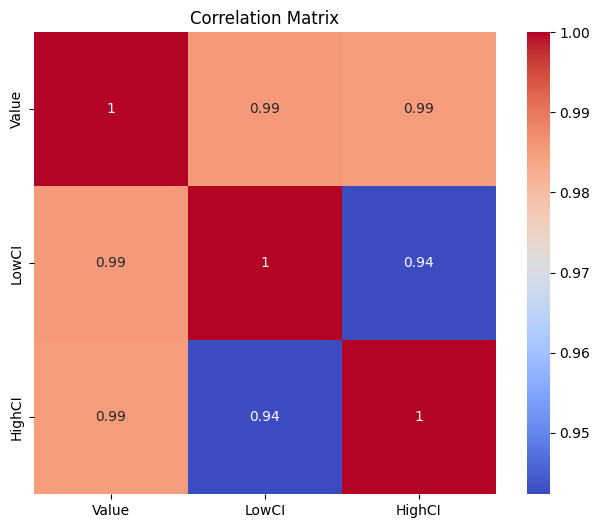

In [13]:
#Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for numerical columns
correlation_matrix = data_cleaned[['Value', 'LowCI', 'HighCI']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


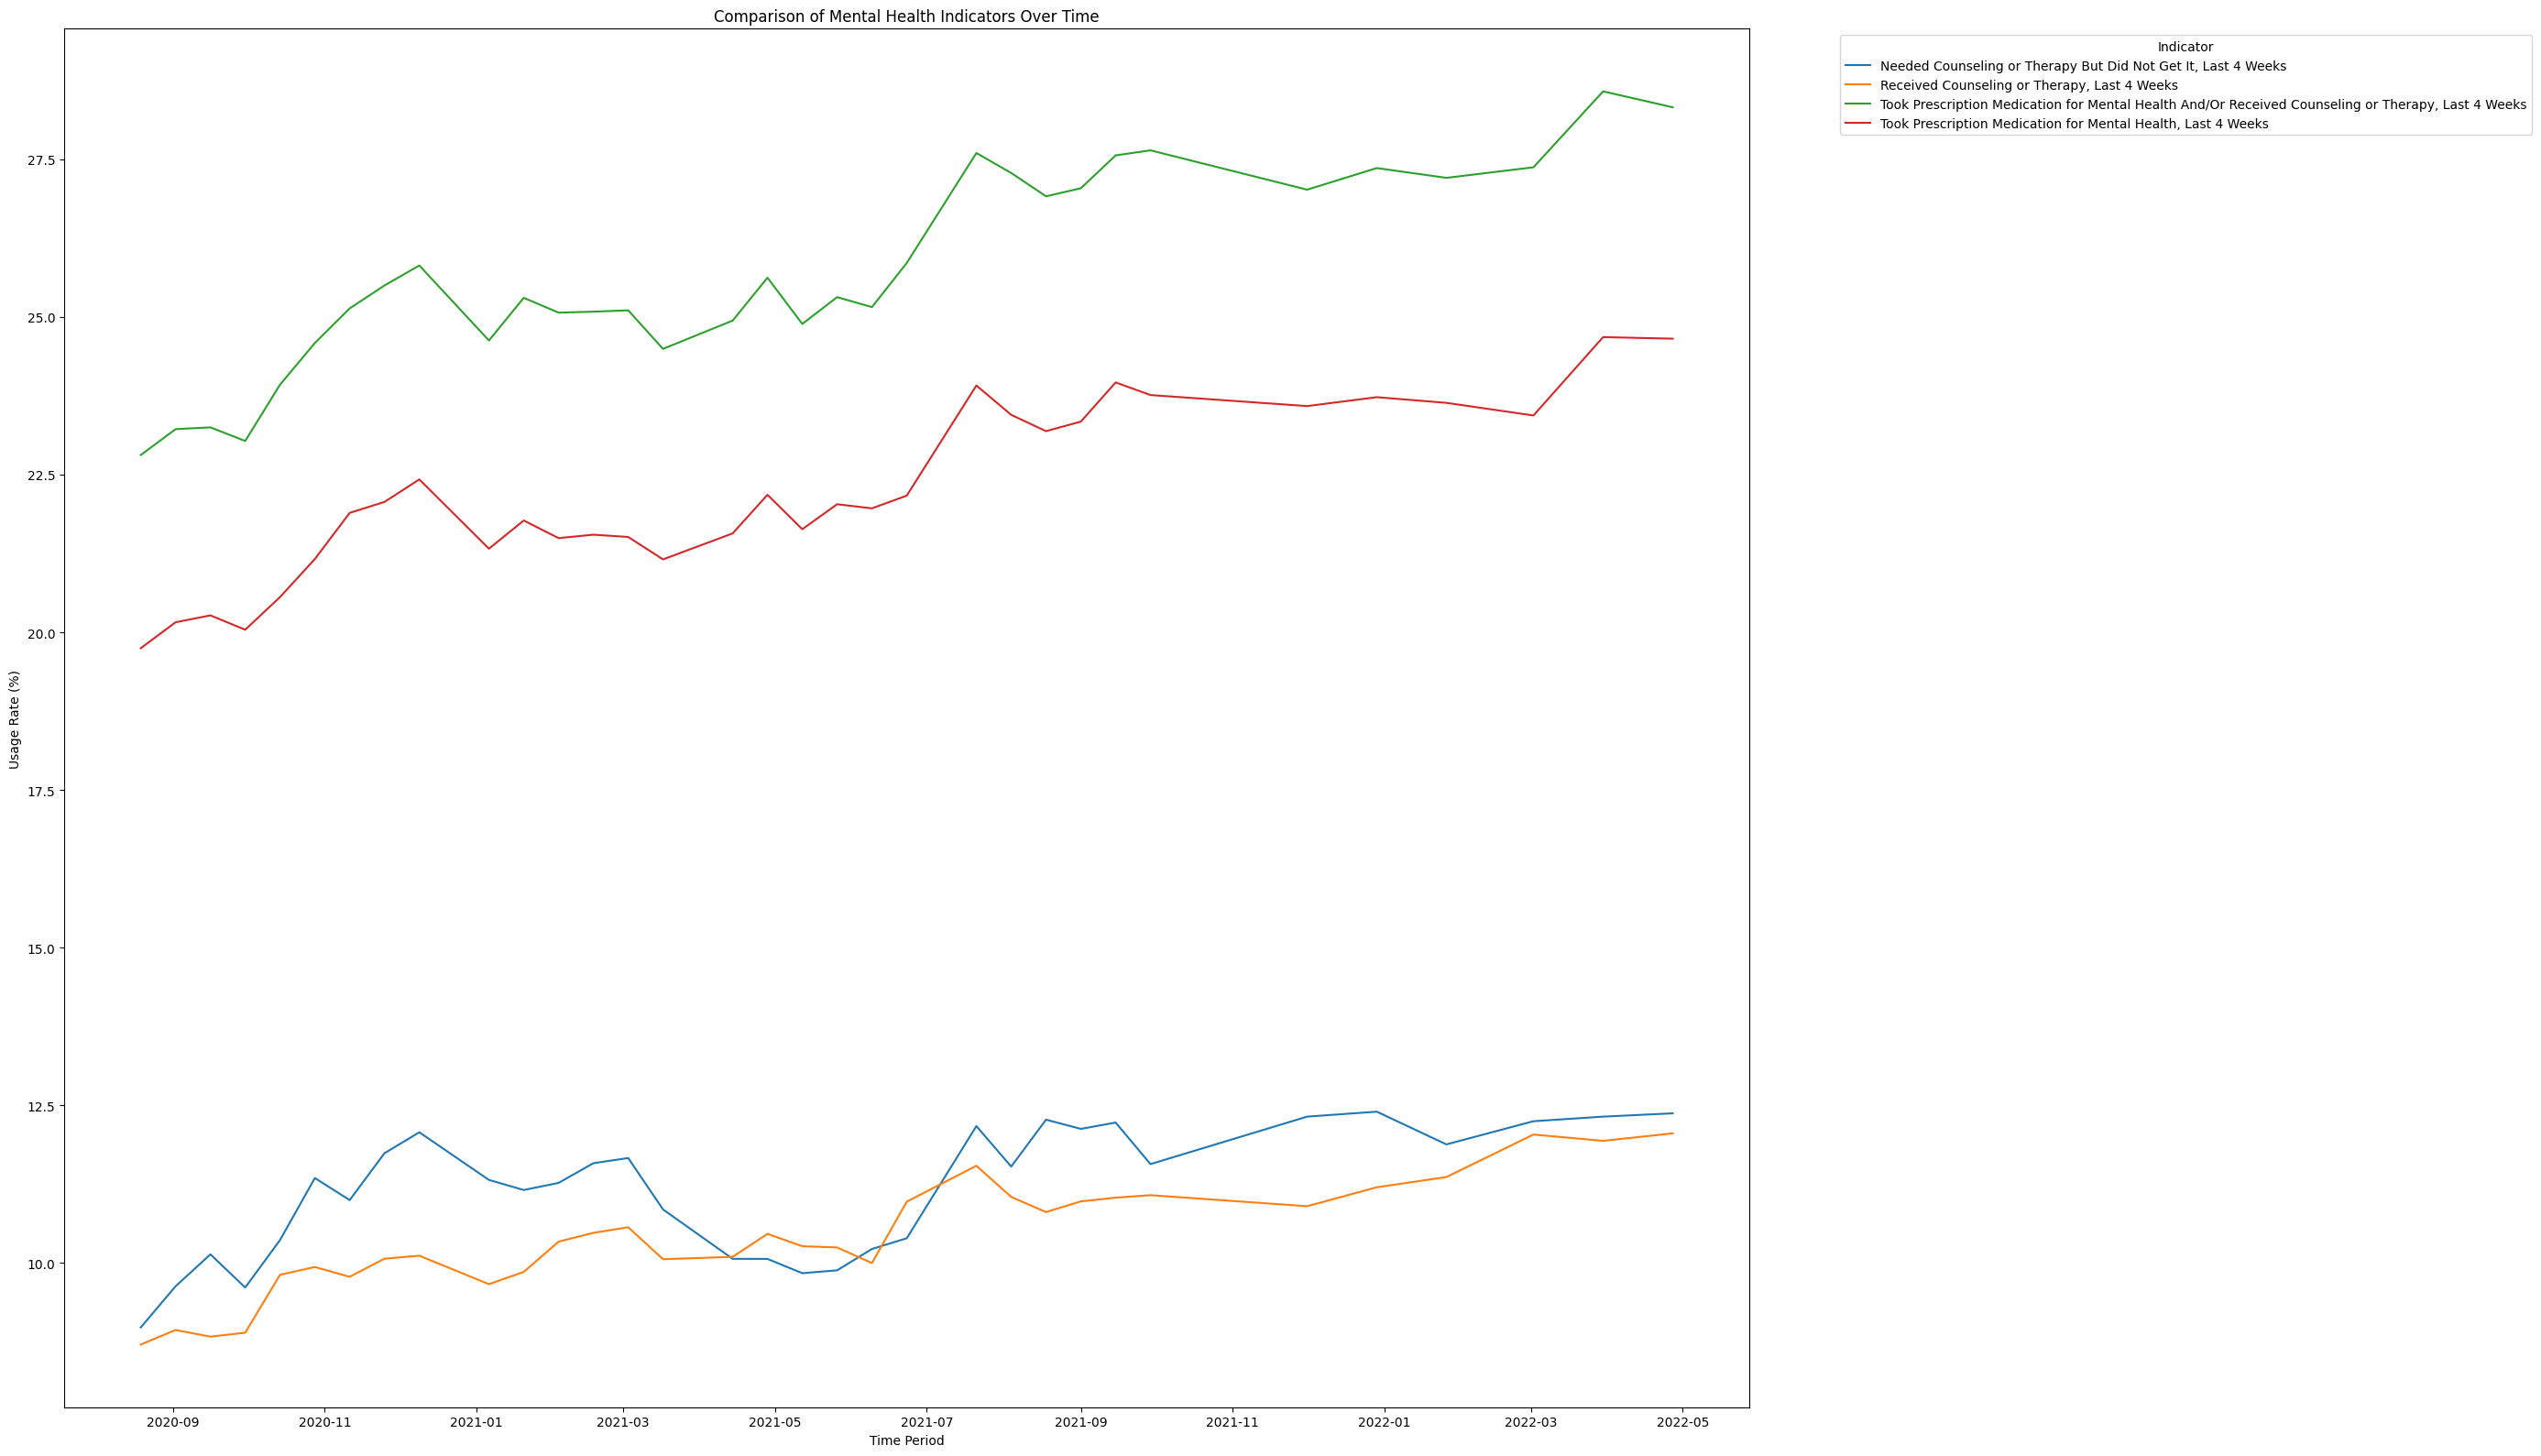

In [14]:
# Multiple Time Series Line Plot for Comparison

# Pivot data to have multiple indicators as columns
multi_indicator_data = data_cleaned.pivot_table(values='Value', index='Time Period Start Date', columns='Indicator')

# Plot multiple time series
plt.figure(figsize=(28, 16))
for indicator in multi_indicator_data.columns:
    plt.plot(multi_indicator_data.index, multi_indicator_data[indicator], label=indicator)
plt.title('Comparison of Mental Health Indicators Over Time')
plt.xlabel('Time Period')
plt.ylabel('Usage Rate (%)')
plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [17]:
# Predictive Modeling

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import ConvergenceWarning


# Prepare data (simplified example)
X = pd.get_dummies(data_cleaned[['Value', 'LowCI', 'HighCI']], drop_first=True)
y = data_cleaned['Subgroup'].astype('category').cat.codes

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
warnings.filterwarnings("ignore", category=ConvergenceWarning)
model = LogisticRegression(max_iter=5000, solver='saga')
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.17      0.49      0.25        43
           1       0.11      0.20      0.15        40
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00        46
           5       0.02      0.06      0.03        34
           6       0.01      0.03      0.01        35
           7       0.00      0.00      0.00        32
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00        37
          10       0.00      0.00      0.00        44
          11       0.00      0.00      0.00        44
          12       0.23      0.73      0.35        11
          13       0.00      0.00      0.00        40
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00        11
          16       0.06      0.05      0.06        38
          17       0.00    

C:\Users\ritik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ritik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ritik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo